<a href="https://colab.research.google.com/github/G0nkly/pytorch_sandbox/blob/main/primer/NN/PyTorch_NN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

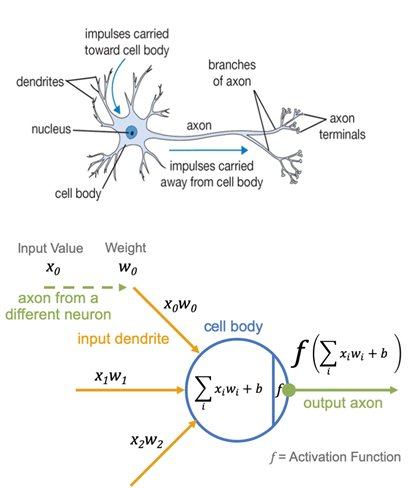

In [ ]:
######################################################
# A SIMPLE (FORWARD-PASS-ONLY) NEURON IN PURE PYTHON #
######################################################

Building blocks:


*   Neuron
*   Weights + Bias
*   Forward Pass
*   Activation Function(s)



In [ ]:
#!! 1. Introducing Non-linearity:
# Neural networks without activation functions are essentially just a series of linear transformations, incapable of capturing complex patterns.
# Activation functions introduce non-linearity, enabling the network to learn non-linear relationships in data.
# This allows the network to model more complex functions and make more sophisticated predictions.
#!! 2. Enabling Learning:
# Differentiable activation functions are crucial for the learning process in neural networks.
# They allow for the calculation of gradients, which are essential for updating weights and biases during training.
# Without differentiability, the learning process would be inefficient and unreliable.
#!! 3. Stabilizing Training:
# Activation functions can help map input data to a known range, such as 0 to 1 or -1 to 1.
# This helps stabilize the training process and prevent issues like vanishing gradients.
#!! 4. Improving Efficiency:
# Differentiable activation functions provide a clear path for optimization algorithms like gradient descent.
# This efficiency is particularly important for training deep neural networks, where computational costs are significant. import math

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def relu(x):
    return max(0, x)

def identity(x):
    return x


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    # Generate 100 equally spaced values from -10 to 10
    x = np.linspace(-10, 10, 100)
    # Compute the sigmoid function values
    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Sigmoidal Activation Function')
    plt.grid(True)
    plt.show()


def plot_tanh():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute tanh values for corresponding x
    tanh = np.tanh(x)

    # Plot the tanh function
    plt.plot(x, tanh)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Tanh Activation Function')
    plt.grid(True)
    plt.show()


def plot_relu():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute ReLU values for corresponding x
    relu = np.maximum(0, x)

    # Plot the ReLU function
    plt.plot(x, relu)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('ReLU Activation Function')
    plt.grid(True)
    plt.show()


def plot_leaky_relu():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Define the leaky ReLU function
    def leaky_relu(x, alpha=0.1):
        return np.where(x >= 0, x, alpha * x)

    # Compute leaky ReLU values for corresponding x
    leaky_relu_values = leaky_relu(x)

    # Plot the leaky ReLU function
    plt.plot(x, leaky_relu_values)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Leaky ReLU Activation Function')
    plt.grid(True)
    plt.show()


def plot_softmax():
    class_labels = ["Class A", "Class B", "Class C"]
    probabilities = np.array([0.2, 0.3, 0.5])
    plt.bar(class_labels, probabilities)
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.title("Softmax Activation Function")
    plt.show()

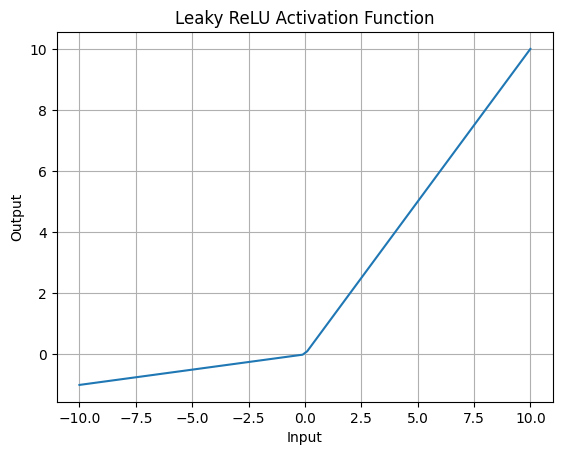

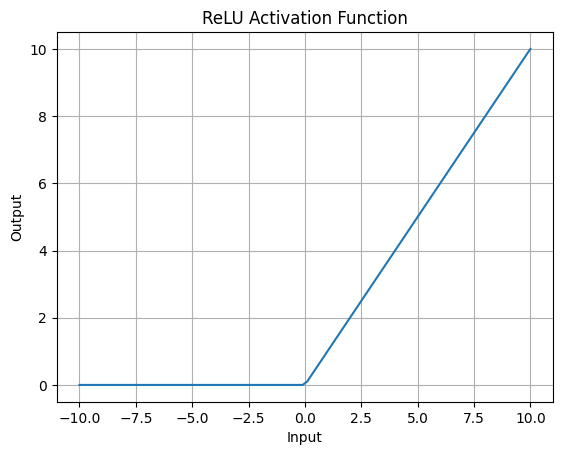

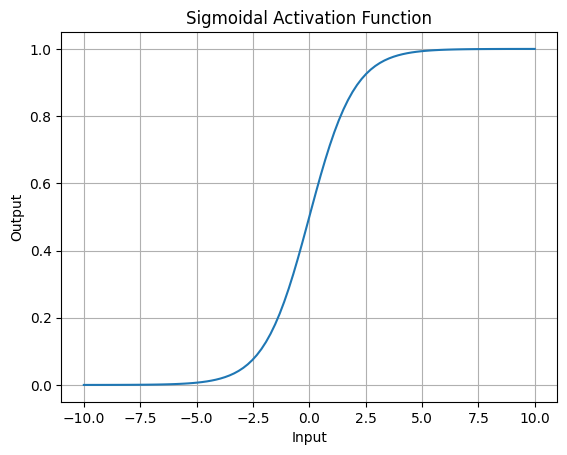

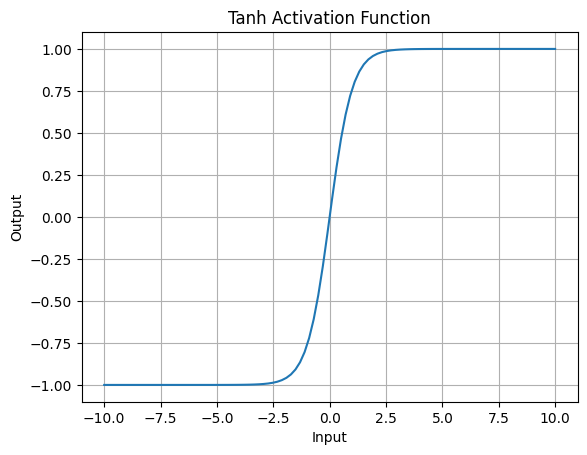

(None, None, None, None)

In [ ]:
plot_leaky_relu(), plot_relu(), plot_sigmoid(), plot_tanh()

In [ ]:
class Neuron:
    def __init__(self, n_inputs, activation=sigmoid):
        # Initialize weights and bias
        self.weights = [0.0] * n_inputs
        self.bias = 0.0
        self.activation = activation

    def forward(self, inputs):
        # Weighted sum + bias
        z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        return self.activation(z)

In [ ]:
n = Neuron(3, activation=sigmoid)
n.weights = [0.5, -0.6, 0.1]
n.bias = 0.0

output = n.forward([1.0, 2.0, 3.0])
print(f"Neuron output: {output}")


Neuron output: 0.401312339887548


In [ ]:
############################################################
# A SIMPLE NEURON IN PURE PYTHON (FORWARD / BACKWARD PASS) #
############################################################

Building blocks:


*   Loss / Lossfunction
*   Backward Pass
*   Gradient
*   Concept of an optimizer
*   "Training"
  * Epochs, Train/Test set



In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        self.weights = [0.0] * n_inputs
        self.bias = 0.0

    def forward(self, inputs):
        self.inputs = inputs
        self.z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        self.output = sigmoid(self.z)
        return self.output

    def backward(self, target):
      """
      Compute gradients of loss w.r.t weights and bias using backpropagation.
      Assumes loss is mean squared error: (y_pred - target)^2
      """
      # 1. Compute the output error (difference between prediction and true value)
      prediction = self.output
      error = prediction - target  # dL/dy, where L = (y - target)^2

      # 2. Compute gradient of sigmoid: dy/dz
      sigmoid_grad = prediction * (1 - prediction)

      # 3. Chain rule: dL/dz = dL/dy * dy/dz
      delta = error * sigmoid_grad  # This is ∂L/∂z

      # 4. Compute gradients for weights and bias
      self.d_weights = [delta * x_i for x_i in self.inputs]  # ∂L/∂w_i = delta * x_i
      self.d_bias = delta                                    # ∂L/∂b = delta * 1

      # 5. Return the squared error just for loss tracking (optional)
      loss = error ** 2
      return loss


    def step(self, learning_rate=0.1):
        # Apply gradient descent
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * self.d_weights[i]
        self.bias -= learning_rate * self.d_bias

0.0
0.0


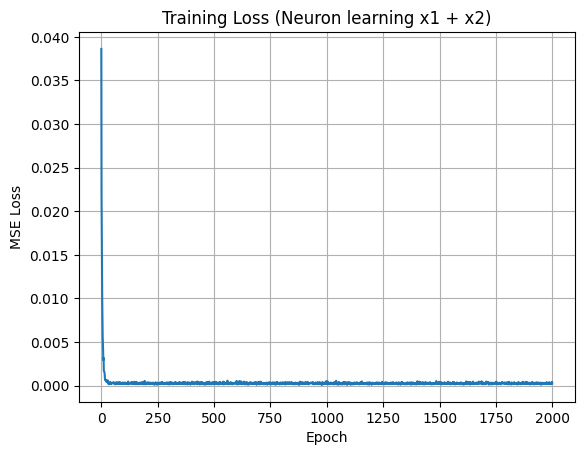

2.2776091840443367
2.270700920474604


In [ ]:
import random
# --- Training loop ---
neuron = Neuron(n_inputs=2)
losses = []

for wei in neuron.weights:
  print(wei)

for epoch in range(2000):
    total_loss = 0.0
    for _ in range(100):  # batch of 100 random samples
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        x = [x1, x2]
        y_true = x1 + x2  # target output

        # normalize target because sigmoid only outputs (0, 1)
        y_true_norm = y_true / 2.0

        y_pred = neuron.forward(x)
        loss = neuron.backward(y_true_norm)
        neuron.step(learning_rate=0.5)
        total_loss += loss

    losses.append(total_loss / 100)  # average loss per batch

# --- Plotting the loss ---
plt.plot(losses)
plt.title("Training Loss (Neuron learning x1 + x2)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


for wei in neuron.weights:
  print(wei)

In [32]:
test_input = [0.3, 0.1]
true_sum = sum(test_input)
predicted = neuron.forward(test_input) * 2  # denormalize
print(f"Predicted: {predicted:.2f}, True: {true_sum:.2f}")

Predicted: 0.41, True: 0.40


In [33]:
import random
import matplotlib.pyplot as plt

class LinearNeuron:
    def __init__(self, n_inputs):
        self.weights = [random.uniform(-1, 1) for _ in range(n_inputs)]
        self.bias = random.uniform(-1, 1)

    def forward(self, inputs):
        self.inputs = inputs
        self.z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        self.output = self.z  # No activation
        return self.output

    def backward(self, target):
        # Mean squared error: L = (output - target)^2
        prediction = self.output
        error = prediction - target  # dL/dy
        delta = error                # dy/dz = 1 for linear output

        self.d_weights = [delta * x for x in self.inputs]
        self.d_bias = delta
        return error ** 2  # squared error for loss tracking

    def step(self, learning_rate=0.1):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * self.d_weights[i]
        self.bias -= learning_rate * self.d_bias

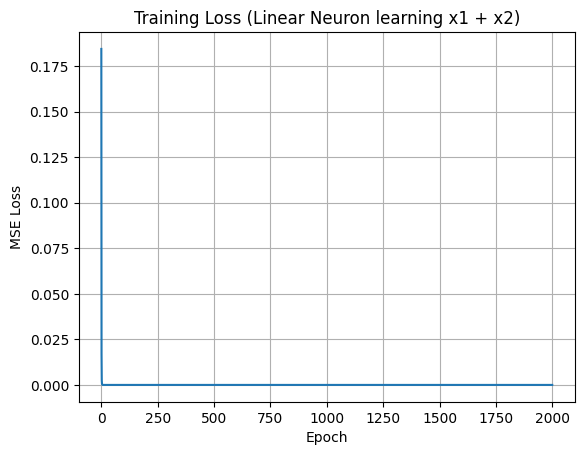

In [34]:
neuron = LinearNeuron(n_inputs=2)
losses = []

for epoch in range(2000):
    total_loss = 0.0
    for _ in range(100):  # mini-batch
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        x = [x1, x2]
        y_true = x1 + x2

        y_pred = neuron.forward(x)
        loss = neuron.backward(y_true)
        neuron.step(learning_rate=0.1)
        total_loss += loss

    losses.append(total_loss / 100)  # average batch loss

# Plotting
plt.plot(losses)
plt.title("Training Loss (Linear Neuron learning x1 + x2)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [36]:
test_input = [0.8, 20.7]
predicted = neuron.forward(test_input)
print(f"Input: {test_input}, Predicted Sum: {predicted:.2f}, True Sum: {sum(test_input):.2f}")


Input: [0.8, 20.7], Predicted Sum: 21.50, True Sum: 21.50


In [37]:
import random
import math
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

class SigmoidNeuron:
    def __init__(self, n_inputs):
        self.weights = [random.uniform(-1, 1) for _ in range(n_inputs)]
        self.bias = random.uniform(-1, 1)

    def forward(self, inputs):
        self.inputs = inputs
        self.z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        self.output = sigmoid(self.z)
        return self.output

    def backward(self, target):
        prediction = self.output
        error = prediction - target  # dL/dy
        delta = error * sigmoid_derivative(prediction)  # dL/dz = dL/dy * dy/dz
        self.d_weights = [delta * x for x in self.inputs]
        self.d_bias = delta
        return error ** 2

    def step(self, learning_rate=0.1):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * self.d_weights[i]
        self.bias -= learning_rate * self.d_bias


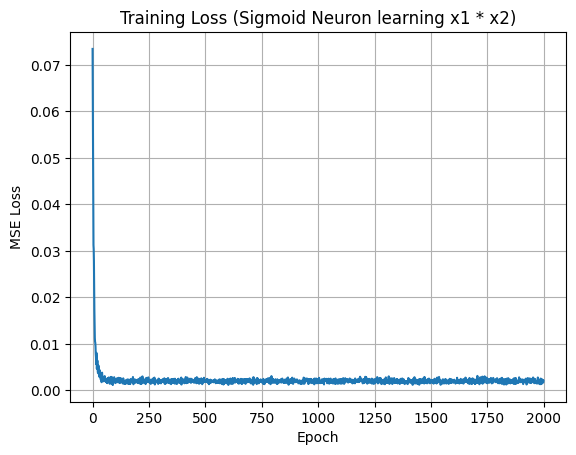

In [38]:
neuron = SigmoidNeuron(n_inputs=2)
losses = []

for epoch in range(2000):
    total_loss = 0.0
    for _ in range(100):  # mini-batch
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        x = [x1, x2]
        y_true = x1 * x2  # new target: product

        y_pred = neuron.forward(x)
        loss = neuron.backward(y_true)
        neuron.step(learning_rate=0.5)
        total_loss += loss

    losses.append(total_loss / 100)

# Plot loss
plt.plot(losses)
plt.title("Training Loss (Sigmoid Neuron learning x1 * x2)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [40]:
test_input = [3.8, 2.7]
predicted = neuron.forward(test_input)
true_product = test_input[0] * test_input[1]
print(f"Input: {test_input}, Predicted Product: {predicted:.3f}, True Product: {true_product:.3f}")


Input: [3.8, 2.7], Predicted Product: 1.000, True Product: 10.260
